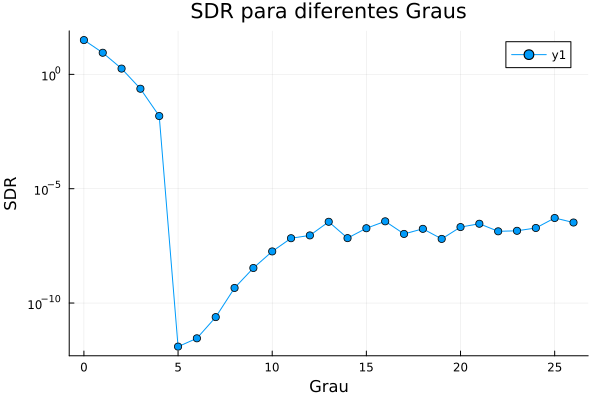

In [53]:
#=  Vitor Hugo Guerra 
    123600066     =#

#criando 30 valores de x aleatórios 
x = range(0, 1, length = 30)
#definindo valores arbitrários dos coeficientes
a1, a2, a3, a4, a5, a6 = 6.0, 5.0, 4.0, 3.0, 2.0, 1.0
#calculando os valores de y para o polinomio criado
y = a1*x .+ a2*x.^2 .+ a3*x.^3 .+ a4*x.^4 .+ a5*x.^5 .+ a6

#utilizando a funçao apresentada no material para calculo do min quadrado
function quadmin(x, y, F)
    n = length(x)    #definindo qtde de dados 
    p = length(F)    #definindo qtde de equaçoes 
    M = zeros(p, p)  #criando matriz vazia que recebera somatorios
    c = zeros(p)     #criando vetor vazio que recebero somatorios
    for j = 1:p
        for k = 1:p
            M[j,k] = sum(F[j](x[i]) * F[k](x[i]) for i = 1:n) #montando a primeira matriz (M)
        end
        c[j] = sum(y[i] * F[j](x[i]) for i = 1:n)
    end
    β = M \ c #calculando minimos quadrados 
    h(x) = sum(F[j](x) * β[j] for j = 1:p) #calculando modelo encontrado por minimos quadrados 
    return β, h
end

n = 26 # Grau máximo da regressão polinomial
SQR = zeros(Float64, n + 1)  # Inicializa o vetor para armazenar SQR, agora com n+1 posições

# Regressão para cada grau de 0 até n (29)
for i = 0:n
    β, modelo = quadmin(x, y, [x -> x^j for j = 0:i])  # Regressão polinomial de grau i
    r = y - modelo.(x)  # Calcula o resíduo
    SQR[i + 1] = sqrt(sum(r .^ 2))  # Calcula e armazena a soma dos quadrados dos resíduos
end

# Criando o gráfico
using Plots
eixoX = 0:n  # Os graus
plot(eixoX, SQR, xlabel="Grau", ylabel="SDR", yaxis=:log10, title="SDR para diferentes Graus", marker=:circle)


o grafico com os erros para cada polinomio evidencia que o polinomio otimo é realmente o de grau 5
essa constatação poderia ser feita até antes de aplicar as regressoes, visto que nossos dados eram provenientes de um polinomio de grau 5

ao tentar fazer a regressao com polinomios de grau a partir de 27 o erro "LinearAlgebra.SingularException(28)" aparece. Isso acontece pq a partir deste ponto, pelo metodo de regressao utilizado, o sistema linear passa a nao ter solução única. 